# APS1 TRANSCAL
## Insper | 5 semestre
### Alunos: Antônio, Ariel, Arthur Barreto e Felipe 

In [11]:
# definindo os modelos para transferencia de calos
# a haleta não é infinita, não pode ser caso D
# não é adiabatica, não pode ser  b
# a temperatura não é especificada, logo não é caso C
# portotanto, temos convecção, caso A

import numpy as np
import matplotlib.pyplot as plt

In [12]:
def calcula_m(h,P,k,A):
    return np.sqrt(np.divide(h*P,k*A))

def calcula_M(h,P,k,A,tb,t_inf):
    return np.sqrt(np.divide(h*P,k*A))*(tb-t_inf)

def distribuicao_temperatura_caso_a(m,L,x,h,k,tb,t_inf):
    numerador = np.cosh(m*(L-x)) + np.divide(h,m*k)*np.sinh(m*(L-x))
    denominador = np.cosh(m*L) + np.divide(h,m*k)*np.sinh(m*L)
    razao = np.divide(numerador,denominador)
    # comverter a temperatura
    return np.multiply(razao,(tb-t_inf)) + t_inf

def transferencia_calor_caso_a(M,m,L,h,k):
    numerador = np.sinh(m*L) + np.divide(h,m*k)*np.cosh(m*L)
    denominador = np.cosh(m*L) + np.divide(h,m*k)*np.sinh(m*L)
    return np.multiply(M,np.divide(numerador,denominador))

## Questão 1
### Exercício A

In [13]:
# dados do problema
k_al = 240 # W/mK
t_s = 100 + 273.15 # K
t_amb = 25 + 273.15 # K
w = 240e-3 # m
t = 20e-3 # m
h_conv = 20 # W/mK
L = 200e-3 # m

# calculos
perimetro = 2*w + 2*t
area = w*t

In [14]:
m = calcula_m(h_conv,perimetro,k_al,area)
lista_x = np.arange(0,L,0.001)
lista_t = []
for i in range(len(lista_x)):
    lista_t.append(distribuicao_temperatura_caso_a(m,L,lista_x[i],h_conv,k_al,t_s,t_amb))

Text(0.5, 1.0, 'Distribuição de temperatura')

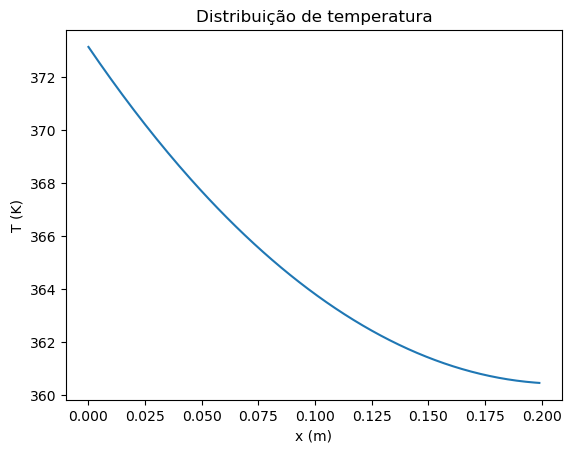

In [15]:
# plot dp grafico
plt.plot(lista_x,lista_t)
plt.xlabel('x (m)')
plt.ylabel('T (K)')
plt.title('Distribuição de temperatura')

In [16]:
# temperatura na extremidade
print(f'Temperatura na extremidade: {lista_t[-1]:.3f} K')

Temperatura na extremidade: 360.461 K


### Exercício B

In [17]:
M = calcula_M(h_conv,perimetro,k_al,area,t_s,t_amb)
q_a = transferencia_calor_caso_a(M,m,L,h_conv,k_al)
print(f'Fluxo de calor: {q_a:.3f} W')

Fluxo de calor: 125.548 W


## Exercício C

In [18]:
def eficiencia(qa,h,area_superficie,t_s,t_inf):
    return np.divide(qa,(h*area_superficie*(t_s-t_inf)))

def efetividade(qa,h,area_base,t_s,t_inf):
    return np.divide(qa,(h*area_base*(t_s-t_inf)))

In [19]:
# calculando a eficiencia da aleta
area_superficie = w*t + 2*t*L + 2*L*w
area_base = w*t
print(f'Eficiencia: {eficiencia(q_a,h_conv,area_superficie,t_s,t_amb):.3f}')

Eficiencia: 0.769


### Exercício D

In [20]:
#calculando a efetividade
print(f'Efetividade: {efetividade(q_a,h_conv,area_base,t_s,t_amb):.3f}')

Efetividade: 17.437


### Exercício E

In [21]:
# metodos para caso d, aleta infinita

def distribuicao_temperatura_caso_d(m,x, tb, t_inf):
    aux = np.exp(-m*x)
    # convertendo a temperatura
    return np.multiply(aux,(tb-t_inf)) + t_inf

def transferencia_calor_caso_d(M):
    return M

In [22]:
q_d = transferencia_calor_caso_d(M)
print(f'Fluxo de calor: {q_d:.3f} W')

Fluxo de calor: 225.347 W


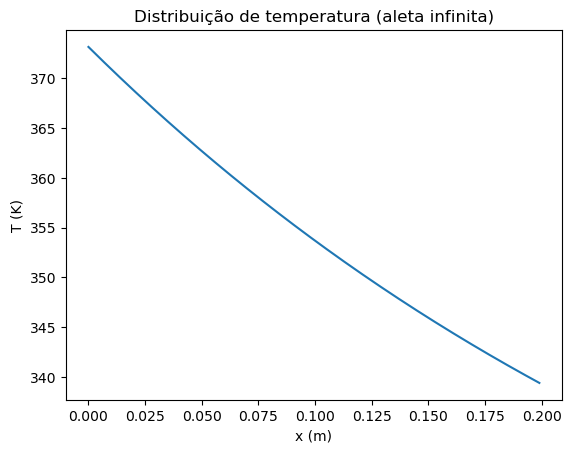

In [23]:
lista_t_d = []
for i in range(len(lista_x)):
    lista_t_d.append(distribuicao_temperatura_caso_d(m,lista_x[i],t_s,t_amb))

# plot dp grafico
plt.plot(lista_x,lista_t_d)
plt.xlabel('x (m)')
plt.ylabel('T (K)')
plt.title('Distribuição de temperatura (aleta infinita)')
plt.show()

In [24]:
# a temperatura na extremidade é 
temperatura_extremidade_caso_d = lista_t_d[-1]
print(f'Temperatura na extremidade: {temperatura_extremidade_caso_d:.3f} K')

Temperatura na extremidade: 339.397 K


### Exercício F

In [25]:
razao_item_2_item_5 = np.divide(q_d,q_a)
print(f'Razão entre os fluxos de calor: {razao_item_2_item_5:.3f}')
# mesmo considerando a aleta infinita, o ganho não foi considerável em relação ao caso a

Razão entre os fluxos de calor: 1.795


### Exercício G

A fim de calcular qual o comprimento da aleta para que a hipotese de aleta infinita forneca a medida correta da taxa de transferencia de calor, ha necessidade de compararmos e iterarmos em um while loop, com uma taxa de erro epsilon. Este loop ira aumentando o comprimento ate a temperatura na extremidade do corpo ser igual (com certa taxa de erro) a temperatura calculada anteriormente.

In [26]:
# vamos estimar um novo valor para L de tal forma que a temperatura da extremidade seja igual no caso da aleta infinita
epsilon = 1e-5
comprimento = 0

while(True):
    area_superficie_infinita = w*t + 2*t*comprimento + 2*comprimento*w
    m = calcula_m(h_conv,perimetro,k_al,area_superficie_infinita)
    temp = distribuicao_temperatura_caso_d(m,comprimento,t_s,t_amb)
    if(temp - lista_t_d[-1] < epsilon):
        print(f'Temperatura na extremidade: {temp:.3f} K')
        break
    comprimento += epsilon
print(f'Comprimento: {comprimento:.3f} m')

Temperatura na extremidade: 339.397 K
Comprimento: 4.299 m


## Questão 2
### Exercício 1

<p> A questão 1 se encontra no pdf aps1.pdf

### Exercício 2

In [29]:
def calcula_kb(Tb,Tinf,TA,TB,ka):
    const = np.power(np.divide(np.log(Tb-Tinf)-np.log(TA-Tinf),np.log(Tb-Tinf)-np.log(TB-Tinf)),2)
    return np.multiply(ka,const)

In [30]:
# definindo os dados
ka = 240 # W/m^2K
TA = 75 + 273.15 # K
Tinf = 25 + 273.15 # K
Tb = 100 + 273.15 # K
TB = 60 + 273.15 # K

In [31]:
kb = calcula_kb(Tb,Tinf,TA,TB,ka)
print(f'kb: {kb:.3f} W/m^2K')

kb: 67.928 W/m^2K
